#0. computer vision libraries to be aware of

toruchvision , torchrec , torchaudio etc

`torchvision` - base domain lib for pytorch computer vision

torchvision.datasets - get datasets and daata loading functons for compouter vision here

torchvision.transforms-functions for manupulating ur vision data ( images ) to be suitable for use with an ML model

torch.utils.data.Dataset - base dataset class for pytroch

torch.utils.data.DataLoader - create a python iterable over a dataset

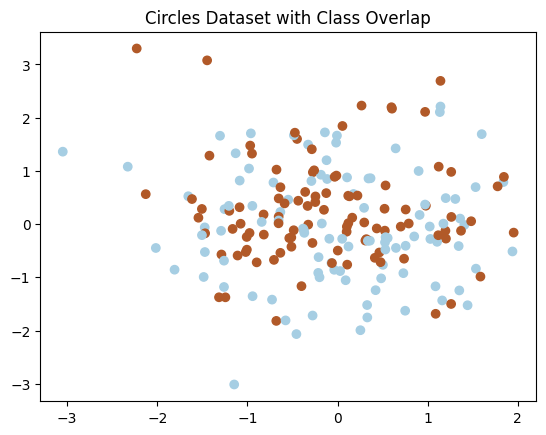

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_circles

# # Generate the circular dataset
# X, y = make_circles(n_samples=200, noise=0.8, factor=0.5)

# # Plot the points
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# plt.title("Circles Dataset with Class Overlap")
# plt.show()
# noise changes the plot

In [ ]:
import torch

from torch import nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor , Lambda , Compose
import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.3MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 226kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 4.18MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.2MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

In [ ]:
len(train_data) , len(test_data)

(60000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#so what actually color channel are ...??
so colour channel are bascially .....colour channels......means ......lets say there is a grayscale image which usually contains white and black colour and colour in between themm....which we can say ....0 is for black , 1 is for white and whatever in between 0 and 1 is a shade of black.......
from 0 to 1 the colour gets more lighter.

so when we say the colour channel for grayscale image is 1 means there are only 2 colours .....

when we say colour channel is 3 means there are 3 colour where each colour goes froom 0 to 1 ......( well basically it would be 4 since when it gets super light i.e when it reaches 1 it becomes white so its white and 3 others but we dont say its 4 since we get white when we set it to 1 ).......

so a pixel can be represented by combination of 3 colour channels....
[ 0.3 0.5 0.9 ] means red will be ( lighter if u think 0 is white and darker if u think 0 is pure red ) green which is 0.5 will be in b/w light and dark and yelllow will be pure yellow

so thats how it works as their combination can creeate more colours


#1.2 visualozing our data

image shape : torch.Size([1, 28, 28])
label : 9


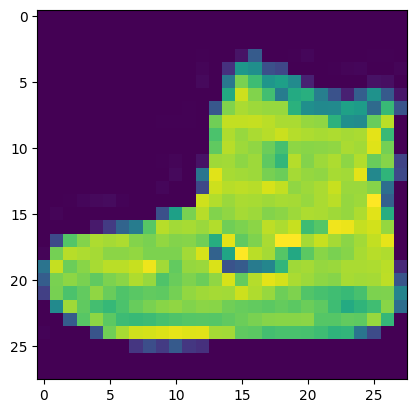

In [ ]:
image , label = train_data[0]
print(f"image shape : {image.shape}")
print(f"label : {label}")
# image is our tensor data

# plt.imshow(image) shows error
plt.imshow(image.squeeze() )
plt.show()



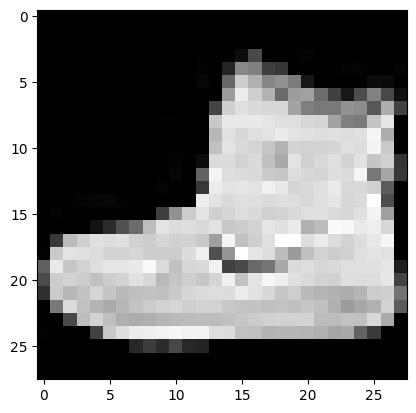

In [ ]:
plt.imshow(image.squeeze() , cmap = "gray")
plt.show()


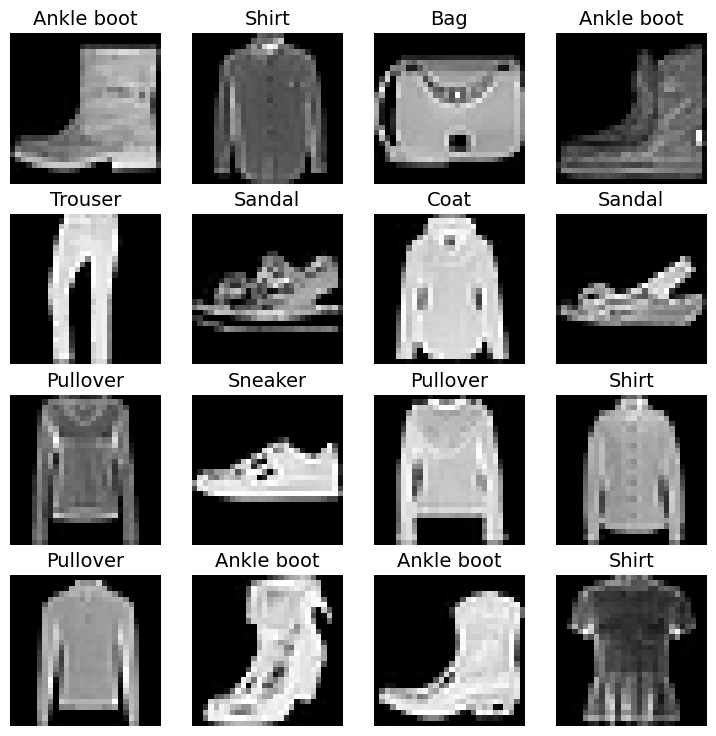

In [ ]:
torch.manual_seed(42)

fig=plt.figure(figsize=(9,9))
rows , cols = 4,4

for i in range( 1, rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    img , label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label],fontsize=14)
    plt.axis(False)
plt.show()

In [ ]:
from torch.utils.data import DataLoader

#setup batch size
BATCH_SIZE = 32

#turn dataset into iterables ( batches )
train_dataLoader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE,
    shuffle = True #shuffle the data on training so the model doesnt learn the data with their indexes
)

test_dataLoader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False # we can turn shuffling off while testing since model havent seen test data anyway
)

train_dataLoader , test_dataLoader

(<torch.utils.data.dataloader.DataLoader at 0x7f1e333f19d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f1e330be5d0>)

In [ ]:
#Lets check out what we have created
print(f"dataloaders : {train_dataLoader , test_dataLoader}")
print(f"length of train dataloader : {len(train_dataLoader)} batches of {BATCH_SIZE}")
print(f"length of test dataloader : {len(test_dataLoader)} batches of {BATCH_SIZE}")

dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x7f1e333f19d0>, <torch.utils.data.dataloader.DataLoader object at 0x7f1e330be5d0>)
length of train dataloader : 1875 batches of 32
length of test dataloader : 313 batches of 32


In [ ]:
#Checkout whats inside the training dataloader

train_features_batch , train_labels_batch = next(iter(train_dataLoader))
print(f"feature batch shape : {train_features_batch.shape}")
print(f"label batch shape : {train_labels_batch.shape}")

feature batch shape : torch.Size([32, 1, 28, 28])
label batch shape : torch.Size([32])


image shape : torch.Size([1, 28, 28])
label : 6


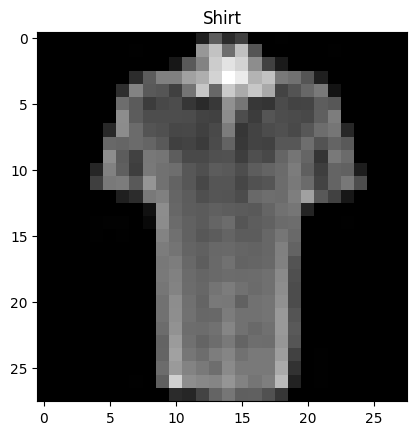

image shape : torch.Size([32, 1, 28, 28])
label shape : torch.Size([32])


In [ ]:
torch.manual_seed(42)

random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
image , label = train_features_batch[random_idx] , train_labels_batch[random_idx]

print(f"image shape : {image.shape}")
print(f"label : {label}")

plt.imshow(image[0].squeeze(),cmap="gray")
plt.title(class_names[label])
plt.show()

image , label = next(iter(train_dataLoader))
print(f"image shape : {image.shape}")
print(f"label shape : {label.shape}")



 ##3.Model 0 :  build a baseline model

 when starting to build a series od ML modelling experiments its a best prractices to start witha baseline modeel

 A baseline model is simple model you will tMry and improve upon with subsequent models / experiments.

 In other words : start simply and add complexity when necessary

In [ ]:
#flattena a continguous rannge of dimensions into a tensor
flatten_model = nn.Flatten()

#geta a single sample
x = train_features_batch[0]

#flatten the sample
output  = flatten_model(x) # perform forward pass

#print what  happended

print(f"{x.shape}")
print(f"{output.shape}")

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten our data first
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units ,
                      out_features = output_shape)
        )

    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#setup model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape = 784, #28*28
    hidden_units = 10, # how many units in hidden layer
    output_shape = len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

#3.1 Setup loss and optimizwr function

In [ ]:
import requests
from pathlib import Path

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  #download the helper functions from the github repo
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


In [ ]:
#import accuracy funtion

from helper_functions import accuracy_fn

#setup loss fn and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

loss_fn , optimizer
#


(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

##Creating functoin to time our experiments


In [ ]:
from timeit import default_timer as timer

def print_train_time(
    start : float ,
    end : float ,
    device : torch.device = None
):
    total_time = end - start
    print(f"Train time on {device} : {total_time:.3f} seconds")
    return total_time


In [ ]:
start_time = timer()

#train the model
end_time = timer()
print_train_time(start_time,end_time,device)

Train time on cpu : 0.000 seconds


3.741800014722685e-05

#Note that optimizer willll update models parameters once per batch not once per epoch



#3.3 Creating a training loop and dtraining a model on batchess of data

1. Loop through epochs
2. Loop through trainiing batches , perform steps and calculate the train loss *per batch* .
3. Loop through testing batches , perform testing steps , calculate the test loss *per batch*
4. print whats happening
5. Time it all (for fun )


In [ ]:
from os import EX_PROTOCOL
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in range(epochs):
    print(f"Epoch : {epoch}\n------------")

    #training
    train_loss = 0
    train_acc = 0

    # our batch coomes in formof image i.e data in X and labels in y.....
    for batch , (X,y) in enumerate(train_dataLoader):
        model_0.train()

        X , y = X.to(device) , y.to(device)

        #1.forward pass
        y_pred = model_0(X) # paass data on trained model and predict label

        #2.calculate the loss
        loss = loss_fn(y_pred,y) # compare the loss in prediction and actual label

        train_loss += loss # accumulate loss in evvry batch ( just for fun)

        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1)) # same for it

        #3. turn optimizer grad to 0

        optimizer.zero_grad()

        #4.backpropogation
        loss.backward()

        #5.optimzation of parameters....Note that optimizer willll update models parameters once per batch not once per epoch
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataLoader.dataset)} samples")

    #  Divide total train loss by length of train dataloader
    train_loss /= len(train_dataLoader)
    train_acc /= len(train_dataLoader)

    #Testing
    test_loss, test_acc =0 ,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataLoader:
          #since X is the data and y is the actual label....its same as for X,y in test_dataLoader

            X,y = X.to(device) , y.to(device)

            #1. forward pass
            test_pred = model_0(X_test) # the raw output of our model will be logits

            #2. calculate testloss
            test_loss += loss_fn(test_pred,y_test)

            #3. calculate accuracy
            test_acc+=accuracy_fn(y_true= y_test , y_pred = test_pred.argmax(dim=1)) # since the test_pred is logits and accuracy_fn thinks y_test and y_pred to be of same DATATYPE .....so we have to call argmax to find the logits value with highest index and that will be the prediction label , and now we will compare the labels with labels in accuracy funciotn.....thats what argmax does

        #calculae the test loss avg per batch

        test_loss /= len(test_dataLoader)

        #calculae the test accuracy avg per batch

        test_acc /= len(test_dataLoader)

    #print whats happening
    print(f"\nTrain loss : {train_loss:.5f} | Train accuracy : {train_acc:.2f}% | Test loss : {test_loss:.5f} | Test accuracy : {test_acc:.2f}%")

      #calculate training time

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                                    device=str(next(model_0.parameters()).device))


Epoch : 0
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss : 2.31847 | Train accuracy : 11.07% | Test loss : 2.31906 | Test accuracy : 10.85%
Epoch : 1
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss : 2.31847 | Train accuracy : 11.07% | Test loss : 2.31906 | Test accuracy : 10.85%
Epoch : 2
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss : 2.31847 | Train accuracy : 11.07% | Test loss : 2.31906 | Test accuracy : 10.85%
Train time on cpu : 29.501 seconds


#4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)

def eval_model(model : torch.nn.Module ,
              data_loader : torch.utils.data.DataLoader ,
              loss_fn : torch.nn.Module ,
              device : torch.device = device):
  loss , acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X , y in data_loader:
      X , y = X.to(device) , y.to(device)

      #make predictions
      y_pred = model(X)

      #accumulate hte loss and acc
      loss+= loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name ": model.__class__.__name__,
          "model_lpss": loss.item(),
          "model_acc": acc}

#calculate mode;_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataLoader,
                             loss_fn=loss_fn)
model_0_results


{'model_name ': 'FashionMNISTModelV0',
 'model_lpss': 2.3190648555755615,
 'model_acc': 10.852635782747603}

#5. setup agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#6. Building a better model in non linearity

In [ ]:
#create a non linear model.....using relu layer inbetween liner layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape ,out_features= hidden_units ),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)


In [ ]:
model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
#creating a loss funciton and opotimizer

loss_fn = nn.CrossEntropyLoss() # bcz we are working with multiclass classification
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

loss_fn , optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [ ]:
torch.manual_seed(42)

epochs = 3
train_loss ,train_acc , test_loss ,test_acc= 0 , 0 , 0 , 0

train_time_start_on_cpu = timer()

for epoch in range(epochs):
  print(f"Epoch : {epoch}\n------------")

  loss , acc = 0 , 0

  for batch , (X,y) in enumerate(train_dataLoader):
    model_1.train()

    X , y = X.to(device) , y.to(device)

    y_pred = model_1(X)

    loss = loss_fn(y_pred,y)

    train_loss += loss

    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataLoader.dataset)} samples")

  train_loss /= len(train_dataLoader)
  train_acc /= len(train_dataLoader)
  #testuing

  model_1.eval()
  with torch.inference_mode():
    for X_test,y_test in (test_dataLoader):
      X_test , y_test = X.to(device) , y.to(device)

      test_pred = model_1(X_test)

      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_true= y_test , y_pred = test_pred.argmax(dim=1))

    test_loss /= len(test_dataLoader)
    test_acc /= len(test_dataLoader)

  print(f"\nTrain loss : {train_loss:.5f} | Train accuracy : {train_acc:.2f}% | Test loss : {test_loss:.5f} | Test accuracy : {test_acc:.2f}%")

# WATCH HOW DANIEL CREATEED THE TRAIN AND TESTING FUNCTION SO THAT WE DONT HAVE TO WRITE IT ALL OVER AGAIN

In [ ]:
def train_step(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    optimizer:torch.optim.Optimizer,
    device:torch.device,
    accuracy_fn,
                ):
  train_loss , train_acc = 0 , 0

  for batch , (X,y) in enumerate(data_loader):
    model.train()

    X , y = X.to(device) , y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred,y)

    train_loss += loss

    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"\nTrain loss : {train_loss:.5f} | Train accuracy : {train_acc:.2f}%")


In [ ]:
def test_step(model : torch.nn.Module ,
              data_loader : torch.utils.data.DataLoader ,
              loss_fn : torch.nn.Module ,
              accuracy_fn,
              device : torch.device = device):

  test_loss , test_acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X , y in data_loader:
      X , y = X.to(device) , y.to(device)

      #make predictions
      test_pred = model(X)

      #accumulate hte loss and acc
      test_loss+= loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss :{test_loss:.5f} | Test acc :{test_acc:.5f}")


In [ ]:
def eval_model(model : torch.nn.Module ,
              data_loader : torch.utils.data.DataLoader ,
              loss_fn : torch.nn.Module ,
              accuracy_fn,
              device : torch.device = device):
  loss , acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X , y in data_loader:
      X , y = X.to(device) , y.to(device)

      #make predictions
      y_pred = model(X)

      #accumulate hte loss and acc
      loss+= loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name ": model.__class__.__name__,
          "model_lpss": loss.item(),
          "model_acc": acc}



In [ ]:
torch.manual_seed(42)

epochs = 3

model_1_train = train_step(model=model_1,
           data_loader=train_dataLoader,
           loss_fn=loss_fn,
           optimizer=optimizer,
           device=device,
           accuracy_fn=accuracy_fn)

#calculate mode;_0 results on test dataset
test_step(model=model_1,
                             data_loader=test_dataLoader,
                             accuracy_fn=accuracy_fn,
                             loss_fn=loss_fn)




Train loss : 0.59972 | Train accuracy : 77.00%
Test loss :0.68342 | Test acc :74.83027


In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataLoader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name ': 'FashionMNISTModelV1',
 'model_lpss': 0.683424174785614,
 'model_acc': 74.83027156549521}

#Model 2: Building a convolutional Neural network ( CNN )

CNN's are also known as ConvNets

CNN's   are known for their capabilities to fund pattern in visual data



a convutional block is compriesed of :
 1.  convolutional layer
 2.  ReLU activation layer
 3.  pooling layer

these layers can be in any order or any number.....

 a group of convulotional block makes a deeper CNN while only 1 makes a simple CNN....

 the more the blocks the deeper the model gets.....



In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
              out_channels=hidden_units,
              kernel_size=3, # can also be (3,3)
              stride=1,
              padding=1),  # these are our hyperparameters

         nn.ReLU(),

        nn.Conv2d(
          in_channels=hidden_units,
          out_channels=hidden_units,
          kernel_size=3,
          stride=1,
          padding=1),

          nn.ReLU(),

        nn.MaxPool2d(kernel_size=2,
                 stride=2)
    )
    # this is 1 convolutional block

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, # Change in_channels to hidden_units
              out_channels=hidden_units,
              kernel_size=3, # can also be (3,3)
              stride=1,
              padding=1),  # these are our hyperparameters

         nn.ReLU(),
        nn.Conv2d(
          in_channels=hidden_units,
          out_channels=hidden_units,
          kernel_size=3,
          stride=1,
          padding=1),

        nn.ReLU(),

         nn.MaxPool2d(kernel_size=2,
                 stride=2)
    ) #this is another convo block.......we can make as many as we want......

    # now we want an output layer.......so in previous models what we did was FLATTEN THE OUTPUT OF FINAL LAYER.......so this is what we will do again here

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # why to use 7 ?.....it can be calculated using the formula of it described in its documentation or daniels video
                out_features=output_shape)

        # outputshape is basically length of classes we have
    )

  def forward(self,x:torch.Tensor):
    x = self.conv_block_1(x)
    # print(f" output shape  of conv1 : {x.shape}")
    x = self.conv_block_2(x)
    # print(f"output shape  of conv2 : {x.shape}")
    x = self.classifier(x)
    # print(f"output shape  of classifier: {x.shape}")


    # or x = self.classifier(self.conv_block_2( self.conv_block_1(x)))
    return x


In [ ]:
torch.manual_seed(42)

# input shape is the number of colour channels in out images ....which we talked before about grayscale having 1 while RGB having 3

model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# 7.1 stepping into `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

images  = torch.randn(size=(32,3,64,64))
images[0]

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [ ]:
#creating a single conv layer

conv_layer = nn.Conv2d(in_channels=3,
                out_channels=10,
                kernel_size=(3,3),
                stride=1,
                padding=1)


#pass the data throught thw convolutional layer

# conv_layer(images)

In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28)).unsqueeze(dim=0).to(device)
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [ ]:
model_2(rand_image_tensor)

tensor([[ 0.0426, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], grad_fn=<AddmmBackward0>)

# 7.3 setting up loss funtion and optimizer

In [ ]:
from helper_functions import accuracy_fn
from timeit import default_timer as timer
from tqdm.auto import tqdm

loss_fn = nn.CrossEntropyLoss()

optimizer= torch.optim.SGD(params=model_2.parameters(),lr=0.1)


# 7.4 Training nd testing loop of model 2 using functions

In [ ]:
torch.manual_seed(42)

epochs = 3

train_time_start_on_cpu = timer()

for epoch in range(epochs):
  print(f"\nEpoch : {epoch}\n------------")

  train_step(model=model_2,
             data_loader = train_dataLoader,
             optimizer= optimizer ,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataLoader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)





Epoch : 0
------------

Train loss : 0.30158 | Train accuracy : 89.02%
Test loss :0.31503 | Test acc :88.50839

Epoch : 1
------------

Train loss : 0.28797 | Train accuracy : 89.50%
Test loss :0.31186 | Test acc :88.78794

Epoch : 2
------------

Train loss : 0.27776 | Train accuracy : 90.03%
Test loss :0.30672 | Test acc :89.12740


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataLoader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

#8 compare model results and training time....

In [ ]:
import pandas as pd

compare_results = pd.DataFrame(
    [
     model_0_results,
     model_1_results,
     model_2_results
    ]
)

compare_results


,model_name,model_lpss,model_acc
0,FashionMNISTModelV1,0.681140,74.710463
1,FashionMNISTModelV1,0.683424,74.830272
2,FashionMNISTModelV2,0.306721,89.127396


#9. make and evaluate random predictions with best model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device = device):

  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:

      #prepare the sample ( add a batch dimension and pass to target device )
      sample = torch.unsqueeze(sample,dim=0).to(device)

      #forward pass
      pred_logit = model(sample)

      #get prediction probabillity

      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      #get pred_prob off the GPU for further caclulations
      pred_probs.append(pred_prob.cpu())

  #stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)



In [ ]:
import random

# random.seed(42)
test_samples = [ ]

test_labels=[ ]

for sample , label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

#vir=ew rhe first sample shape

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

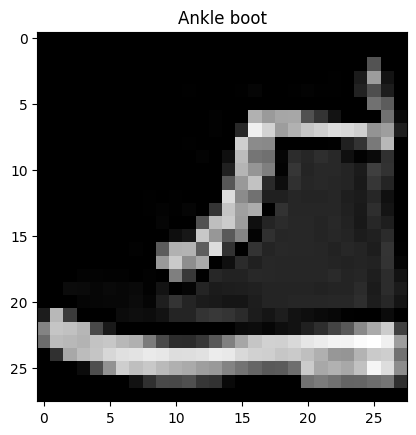

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#make predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples)


#view the first two prediction probabilities samples

pred_probs[:2]

tensor([[1.2719e-03, 8.9217e-05, 6.2357e-04, 2.0167e-03, 5.4754e-04, 2.2483e-01,
         2.2213e-04, 2.8282e-01, 1.8525e-02, 4.6905e-01],
        [7.9971e-05, 1.0450e-06, 9.0995e-05, 1.1530e-05, 1.2837e-05, 2.8459e-04,
         5.5556e-06, 9.8613e-01, 8.1850e-04, 1.2563e-02]])

In [ ]:
#convert the prediction probabilities to labels

pred_classes = pred_probs.argmax(dim=1)
pred_classes , test_labels  # we got both same means we are going in correct direction


(tensor([9, 7, 2, 0, 1, 0, 3, 5, 4]), [9, 7, 2, 0, 1, 0, 4, 5, 4])

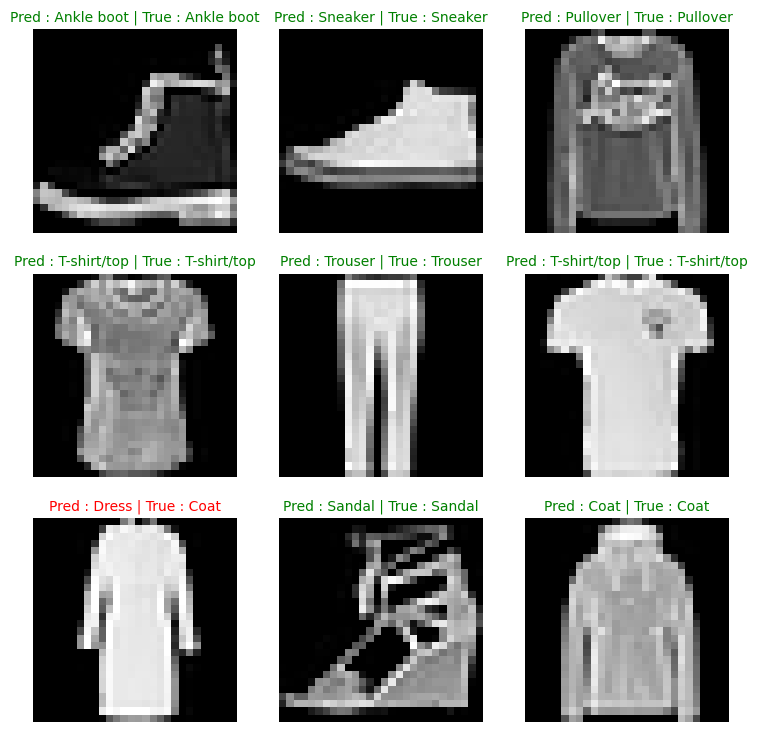

In [ ]:
#plot prediction

plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")

  #find prediciton in text form
  pred_label = class_names[pred_classes[i]]

  #find the true label
  true_label = class_names[test_labels[i]]

  #create a title text

  title_text = f"Pred : {pred_label} | True : {true_label}"

  if pred_label == true_label:
    plt.title(title_text ,fontsize =10 , c="g")
  else:
    plt.title(title_text ,fontsize =10 , c="r")

  plt.axis(False)


#there is more in this seciton of about 1 hr more.......so watch it later on.....